In [502]:
import pandas as pd
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
import seaborn as sns
import numpy as np

In [503]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [220108,220115,220122,220129,220205,220212,220219,220226,220305,220312,220319,220326,220402]
df = get_data(week_nums)

In [504]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657
...,...,...,...,...,...,...,...,...,...,...,...
211014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,05:00:00,REGULAR,0,55
211015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,09:00:00,REGULAR,0,55
211016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,13:00:00,REGULAR,0,55
211017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,17:00:00,REGULAR,0,55


In [505]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [506]:
df.LINENAME.unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'FQ', 'ACEL', 'FLM123',
       'L', 'LG', 'LM', 'A', 'E', 'JMZ', 'JM', 'J', 'M', 'AC1', 'C',
       'ABCD', 'BC', 'ACBD', 'ABCD1', 'CE', 'ACENGRS1237W', 'ACE',
       'ABCDEFM', 'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ',
       'AS', 'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       'EJZ', '1', '1RW', '23', '23ACE', '123', '123FLM', '123ACE',
       '1237ACENQRSW', '1237ACENQRS', '1ABCD', '1AC', '45', '456JZ', '6',
       '6DF', '456LNQRW', '4567S', '456NQRW', '456', '245', '4BD', '4',
       '3', '25', '2', '7BDFM', '7', '7NQW', 'NQW', '7EFMR', '2345R',
       '2345', '2345BDNQR', '2345S', '34', '5'], dtype=object)

In [507]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [508]:
df.DATE.value_counts().sort_index()

01/01/2022    30079
01/02/2022    29905
01/03/2022    29913
01/04/2022    30000
01/05/2022    30009
              ...  
03/28/2022    30119
03/29/2022    30259
03/30/2022    30291
03/31/2022    30050
04/01/2022    30041
Name: DATE, Length: 91, dtype: int64

In [509]:
import datetime
# from datetime import datetime as dt

In [510]:
# Take the date and time fields into a single datetime column
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [511]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00


In [512]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1861785,R158,R084,00-06-00,59 ST COLUMBUS,2022-01-21 23:00:00,2
653067,N039,R251,01-00-00,96 ST,2022-01-25 19:00:00,2
2545550,R533,R055,00-03-01,FLUSHING-MAIN,2022-01-29 15:00:00,2
653612,N039,R251,01-00-01,96 ST,2022-01-25 19:00:00,2
1315230,N506,R022,00-03-02,34 ST-HERALD SQ,2022-02-05 03:00:00,2
654156,N039,R251,01-00-02,96 ST,2022-01-25 19:00:00,2
78199,A037,R170,05-00-03,14 ST-UNION SQ,2022-01-22 04:00:00,2
1819473,R141,R031,00-03-02,34 ST-PENN STA,2022-04-01 04:00:00,1
1819467,R141,R031,00-03-02,34 ST-PENN STA,2022-03-31 04:00:00,1
1819468,R141,R031,00-03-02,34 ST-PENN STA,2022-03-31 08:00:00,1


In [513]:
mask1 = ((df["C/A"] == "R158") & 
(df["UNIT"] == "R084") & 
(df["SCP"] == "00-06-00") & 
(df["STATION"] == "59 ST COLUMBUS") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 21).date()))

df[mask1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
143178,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,03:00:00,REGULAR,573690,778103,2022-01-21 03:00:00
143179,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,07:00:00,REGULAR,573692,778133,2022-01-21 07:00:00
143180,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,12:31:19,REGULAR,573712,778235,2022-01-21 12:31:19
143181,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,15:00:00,REGULAR,573745,778265,2022-01-21 15:00:00
143182,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,19:00:00,REGULAR,573843,778344,2022-01-21 19:00:00
143183,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,23:00:00,REGULAR,573859,778367,2022-01-21 23:00:00
143184,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,23:00:00,RECOVR AUD,10076579,778367,2022-01-21 23:00:00


In [514]:
mask2 = ((df["C/A"] == "N039") & 
(df["UNIT"] == "R251") & 
(df["SCP"] == "01-00-00") & 
(df["STATION"] == "96 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 25).date()))

df[mask2]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
50199,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,03:00:00,REGULAR,3196002,1145604,2022-01-25 03:00:00
50200,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,07:00:00,REGULAR,3196012,1145613,2022-01-25 07:00:00
50201,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,11:00:00,REGULAR,3196195,1145697,2022-01-25 11:00:00
50202,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,15:00:00,REGULAR,3196313,1145770,2022-01-25 15:00:00
50203,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,19:00:00,REGULAR,3196598,1145904,2022-01-25 19:00:00
50204,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,19:00:00,RECOVR AUD,3196596,1145903,2022-01-25 19:00:00
50205,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,23:00:00,REGULAR,3196647,1145950,2022-01-25 23:00:00


In [515]:
mask3 = ((df["C/A"] == "R533") & 
(df["UNIT"] == "R055") & 
(df["SCP"] == "00-03-01") & 
(df["STATION"] == "FLUSHING-MAIN") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 29).date()))

df[mask3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
195817,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,03:00:00,REGULAR,5390246,3015053,2022-01-29 03:00:00
195818,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,07:00:00,REGULAR,5390298,3015082,2022-01-29 07:00:00
195819,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,11:00:00,REGULAR,5390516,3015160,2022-01-29 11:00:00
195820,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,15:00:00,REGULAR,5390653,3015270,2022-01-29 15:00:00
195821,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,15:00:00,RECOVR AUD,5390653,3015269,2022-01-29 15:00:00
195822,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,19:00:00,REGULAR,5390768,3015443,2022-01-29 19:00:00
195823,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,23:00:00,REGULAR,5390869,3015594,2022-01-29 23:00:00


In [516]:
df.DESC.value_counts()

REGULAR       2714020
RECOVR AUD      15189
Name: DESC, dtype: int64

In [517]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [518]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-01 03:00:00,1
1819461,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 04:00:00,1
1819463,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 12:00:00,1
1819464,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 16:00:00,1
1819465,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 20:00:00,1
...,...,...,...,...,...,...
909735,N128,R200,00-00-01,EUCLID AV,2022-01-14 07:00:00,1
909736,N128,R200,00-00-01,EUCLID AV,2022-01-14 11:00:00,1
909737,N128,R200,00-00-01,EUCLID AV,2022-01-14 15:00:00,1
909738,N128,R200,00-00-01,EUCLID AV,2022-01-14 19:00:00,1


In [519]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
211018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,21:00:00,REGULAR,0,55,2022-04-01 21:00:00
211017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,17:00:00,REGULAR,0,55,2022-04-01 17:00:00
211016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,13:00:00,REGULAR,0,55,2022-04-01 13:00:00
211015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,09:00:00,REGULAR,0,55,2022-04-01 09:00:00
211014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,05:00:00,REGULAR,0,55,2022-04-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00


# Pick one single turnstile over a one-week period to investigate week pattern

In [520]:
turnstile1 = df[
    (df["C/A"] == "A002") & 
(df["UNIT"] == "R051") & 
(df["SCP"] == "02-00-00") & 
(df["STATION"] == "59 ST") &
(
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 21).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 22).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 23).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 24).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 25).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 26).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 27).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 28).date())
)
]

turnstile1.sort_values("ENTRIES",ascending=True,inplace=True)
turnstile1.shape

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(48, 12)

In [521]:
turnstile1[["PREV_TIME", "PREV_ENTRIES"]]=(
    turnstile1.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda x: x.shift(1))
)
turnstile1

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/2134829160.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile1.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_TIME,PREV_ENTRIES
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00,NaT,NaN
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00,2022-03-21 00:00:00,7695730.0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00,2022-03-21 04:00:00,7695732.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00,2022-03-21 08:00:00,7695747.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00,2022-03-21 12:00:00,7695779.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,20:00:00,REGULAR,7696015,2681548,2022-03-21 20:00:00,2022-03-21 16:00:00,7695864.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,00:00:00,REGULAR,7696034,2681570,2022-03-22 00:00:00,2022-03-21 20:00:00,7696015.0
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,04:00:00,REGULAR,7696039,2681571,2022-03-22 04:00:00,2022-03-22 00:00:00,7696034.0
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,08:00:00,REGULAR,7696050,2681687,2022-03-22 08:00:00,2022-03-22 04:00:00,7696039.0
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,12:00:00,REGULAR,7696075,2681947,2022-03-22 12:00:00,2022-03-22 08:00:00,7696050.0


In [522]:
turnstile1.dropna(subset=["PREV_TIME"], axis=0, inplace=True)

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [523]:
turnstile1[turnstile1["ENTRIES"] < turnstile1["PREV_ENTRIES"]].head(10) 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_TIME,PREV_ENTRIES


In [524]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstile1["Time_Period_Entries"] = turnstile1.apply(get_daily_counts, axis=1, max_counter=500000)

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/1413324532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstile1["Time_Period_Entries"] = turnstile1.apply(get_daily_counts, axis=1, max_counter=500000)


In [525]:
turnstile1_weekday=turnstile1.iloc[:30]
turnstile1_weekday.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_TIME,PREV_ENTRIES,Time_Period_Entries
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2022,08:00:00,REGULAR,7696899,2683297,2022-03-25 08:00:00,2022-03-25 04:00:00,7696886.0,13.0
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2022,12:00:00,REGULAR,7696917,2683518,2022-03-25 12:00:00,2022-03-25 08:00:00,7696899.0,18.0
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2022,16:00:00,REGULAR,7697037,2683597,2022-03-25 16:00:00,2022-03-25 12:00:00,7696917.0,120.0
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2022,20:00:00,REGULAR,7697165,2683663,2022-03-25 20:00:00,2022-03-25 16:00:00,7697037.0,128.0
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,2022-03-26 00:00:00,2022-03-25 20:00:00,7697165.0,32.0


In [526]:
Weekday_Time_Entires = turnstile1_weekday.groupby("TIME")["Time_Period_Entries"].sum().reset_index()
Weekday_Time_Entires

,TIME,Time_Period_Entries
0,00:00:00,120.0
1,04:00:00,23.0
2,08:00:00,63.0
3,12:00:00,117.0
4,16:00:00,471.0
5,20:00:00,673.0


In [527]:
Weekday_Time_Entires.at[0,"TIME"]="23:59:00" 
Weekday_Time_Entires.sort_values(["TIME"],inplace=True)

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Entries of Weekday Time Period')

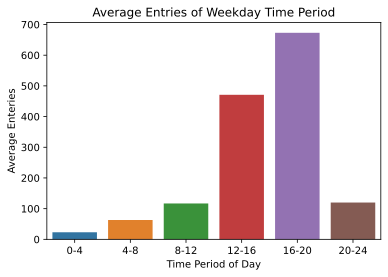

In [528]:
sns.barplot(Weekday_Time_Entires["TIME"],Weekday_Time_Entires["Time_Period_Entries"])
plt.xlabel('Time Period of Day')
plt.ylabel('Average Enteries')
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Average Entries of Weekday Time Period')

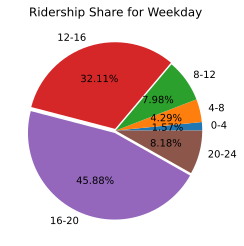

In [529]:
plt.pie(Weekday_Time_Entires["Time_Period_Entries"],labels=['0-4','4-8','8-12','12-16','16-20','20-24'],
        explode = (0, 0, 0,0.02,0.03,0), autopct='%1.2f%%')
plt.title('Ridership Share for Weekday')
plt.show()

In [530]:
turnstile1_weekend=turnstile1.iloc[30:-5]
turnstile1_weekend

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_TIME,PREV_ENTRIES,Time_Period_Entries
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,2022-03-26 04:00:00,2022-03-26 00:00:00,7697197.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,2022-03-26 08:00:00,2022-03-26 04:00:00,7697200.0,4.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,2022-03-26 12:00:00,2022-03-26 08:00:00,7697204.0,15.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,2022-03-26 16:00:00,2022-03-26 12:00:00,7697219.0,59.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,20:00:00,REGULAR,7697339,2683928,2022-03-26 20:00:00,2022-03-26 16:00:00,7697278.0,61.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,00:00:00,REGULAR,7697362,2683972,2022-03-27 00:00:00,2022-03-26 20:00:00,7697339.0,23.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,04:00:00,REGULAR,7697367,2683977,2022-03-27 04:00:00,2022-03-27 00:00:00,7697362.0,5.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,08:00:00,REGULAR,7697370,2684008,2022-03-27 08:00:00,2022-03-27 04:00:00,7697367.0,3.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,12:00:00,REGULAR,7697387,2684073,2022-03-27 12:00:00,2022-03-27 08:00:00,7697370.0,17.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,16:00:00,REGULAR,7697426,2684134,2022-03-27 16:00:00,2022-03-27 12:00:00,7697387.0,39.0


In [531]:
Weekend_Time_Entires = turnstile1_weekend.groupby("TIME")["Time_Period_Entries"].sum().reset_index()
Weekend_Time_Entires.at[0,"TIME"]="23:59:00" 
Weekend_Time_Entires.sort_values(["TIME"],inplace=True)
Weekend_Time_Entires

,TIME,Time_Period_Entries
1,04:00:00,8.0
2,08:00:00,7.0
3,12:00:00,32.0
4,16:00:00,98.0
5,20:00:00,107.0
0,23:59:00,40.0


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Entries of Weekend Time Period')

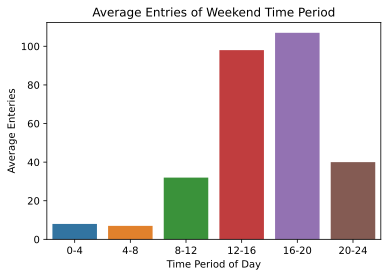

In [532]:
sns.barplot(Weekend_Time_Entires["TIME"],Weekend_Time_Entires["Time_Period_Entries"])
plt.xlabel('Time Period of Day')
plt.ylabel('Average Enteries')
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Average Entries of Weekend Time Period')

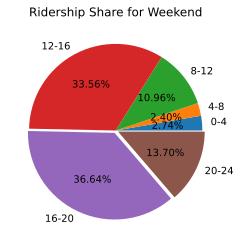

In [533]:
plt.pie(Weekend_Time_Entires["Time_Period_Entries"],labels=['0-4','4-8','8-12','12-16','16-20','20-24'],
        explode = (0, 0, 0,0,0.03,0.03), autopct='%1.2f%%')
plt.title('Ridership Share for Weekend')
plt.show()

# Can I do this for a station?

### Station 59 ST 3/21 to 3/27

In [534]:
Station_59st = df[
(df["STATION"] == "59 ST") &(
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 21).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 22).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 23).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 24).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 25).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 26).date())|
 (df["DATE_TIME"].dt.date == datetime.datetime(2022, 3, 27).date())
)
]
Station_59st

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
167460,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,20:00:00,REGULAR,117533044,905536,2022-03-27 20:00:00
167459,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,16:00:00,REGULAR,117533039,905443,2022-03-27 16:00:00
167458,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,12:00:00,REGULAR,117533034,905324,2022-03-27 12:00:00
167457,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,08:00:00,REGULAR,117533033,905293,2022-03-27 08:00:00
167456,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,04:00:00,REGULAR,117533033,905289,2022-03-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00


In [535]:
Station_59st.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
Station_59st.shape

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(2345, 12)

In [536]:
Station_59st.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],inplace=True, ascending=True)
Station_59st

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
167456,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,04:00:00,REGULAR,117533033,905289,2022-03-27 04:00:00
167457,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,08:00:00,REGULAR,117533033,905293,2022-03-27 08:00:00
167458,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,12:00:00,REGULAR,117533034,905324,2022-03-27 12:00:00
167459,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,16:00:00,REGULAR,117533039,905443,2022-03-27 16:00:00


In [537]:
Station_59st["Pre_Time"] = Station_59st.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME"].apply(lambda x: x.shift(1))
Station_59st

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/961086773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_59st["Pre_Time"] = Station_59st.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME"].apply(lambda x: x.shift(1))


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Pre_Time
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00,NaT
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00,2022-03-21 00:00:00
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00,2022-03-21 04:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00,2022-03-21 08:00:00
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00,2022-03-21 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167456,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,04:00:00,REGULAR,117533033,905289,2022-03-27 04:00:00,2022-03-27 00:00:00
167457,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,08:00:00,REGULAR,117533033,905293,2022-03-27 08:00:00,2022-03-27 04:00:00
167458,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,12:00:00,REGULAR,117533034,905324,2022-03-27 12:00:00,2022-03-27 08:00:00
167459,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,16:00:00,REGULAR,117533039,905443,2022-03-27 16:00:00,2022-03-27 12:00:00


In [538]:
Station_59st["PREV_ENTRIES"] = Station_59st.groupby(["C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].apply(lambda x: x.shift(1))
Station_59st.head(50)

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/1238199764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_59st["PREV_ENTRIES"] = Station_59st.groupby(["C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].apply(lambda x: x.shift(1))


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Pre_Time,PREV_ENTRIES
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00,NaT,NaN
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00,2022-03-21 00:00:00,7695730.0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00,2022-03-21 04:00:00,7695732.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00,2022-03-21 08:00:00,7695747.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00,2022-03-21 12:00:00,7695779.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,20:00:00,REGULAR,7696015,2681548,2022-03-21 20:00:00,2022-03-21 16:00:00,7695864.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,00:00:00,REGULAR,7696034,2681570,2022-03-22 00:00:00,2022-03-21 20:00:00,7696015.0
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,04:00:00,REGULAR,7696039,2681571,2022-03-22 04:00:00,2022-03-22 00:00:00,7696034.0
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,08:00:00,REGULAR,7696050,2681687,2022-03-22 08:00:00,2022-03-22 04:00:00,7696039.0
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2022,12:00:00,REGULAR,7696075,2681947,2022-03-22 12:00:00,2022-03-22 08:00:00,7696050.0


In [539]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
Station_59st["Time_Period_Entries"] = Station_59st.apply(get_daily_counts, axis=1, max_counter=500000)

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/2139143698.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_59st["Time_Period_Entries"] = Station_59st.apply(get_daily_counts, axis=1, max_counter=500000)


In [540]:
Station_59st.fillna(0)
Station_59st['DAY_OF_WEEK_NUM'] = pd.to_datetime(Station_59st['DATE']).dt.dayofweek
Station_59st

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_16535/3807320384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_59st['DAY_OF_WEEK_NUM'] = pd.to_datetime(Station_59st['DATE']).dt.dayofweek


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Pre_Time,PREV_ENTRIES,Time_Period_Entries,DAY_OF_WEEK_NUM
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00,NaT,NaN,NaN,0
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00,2022-03-21 00:00:00,7695730.0,2.0,0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00,2022-03-21 04:00:00,7695732.0,15.0,0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00,2022-03-21 08:00:00,7695747.0,32.0,0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00,2022-03-21 12:00:00,7695779.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167456,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,04:00:00,REGULAR,117533033,905289,2022-03-27 04:00:00,2022-03-27 00:00:00,117533029.0,4.0,6
167457,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,08:00:00,REGULAR,117533033,905293,2022-03-27 08:00:00,2022-03-27 04:00:00,117533033.0,0.0,6
167458,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,12:00:00,REGULAR,117533034,905324,2022-03-27 12:00:00,2022-03-27 08:00:00,117533033.0,1.0,6
167459,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,16:00:00,REGULAR,117533039,905443,2022-03-27 16:00:00,2022-03-27 12:00:00,117533034.0,5.0,6


In [541]:
Station_59st["DAY_OF_WEEK_NUM"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [542]:
Week_Time_Entires=Station_59st.groupby("TIME")["Time_Period_Entries"].sum().reset_index()
Week_Time_Entires

,TIME,Time_Period_Entries
0,00:00:00,15273.0
1,04:00:00,2819.0
2,08:00:00,16632.0
3,12:00:00,28316.0
4,16:00:00,42648.0
5,20:00:00,61955.0


In [543]:
Week_Time_Entires.at[0,"TIME"]="23:59:00" 
Week_Time_Entires.sort_values(["TIME"],inplace=True)
Week_Time_Entires

,TIME,Time_Period_Entries
1,04:00:00,2819.0
2,08:00:00,16632.0
3,12:00:00,28316.0
4,16:00:00,42648.0
5,20:00:00,61955.0
0,23:59:00,15273.0


## Viz for the entire week

Text(0.5, 1.0, 'Total Entries for Time Periods in A Week')

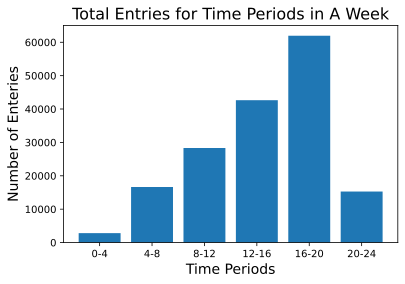

In [544]:
plt.bar(Week_Time_Entires["TIME"],Week_Time_Entires["Time_Period_Entries"])
plt.xlabel('Time Periods',fontsize=14)
plt.ylabel('Number of Enteries',fontsize=14)
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Total Entries for Time Periods in A Week',fontsize=16)

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 65000.0)

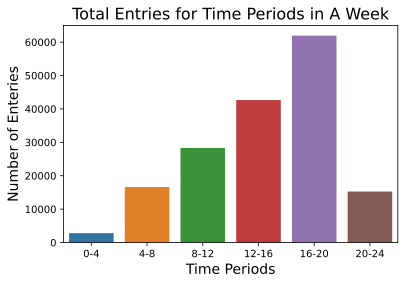

In [545]:
sns.barplot(Week_Time_Entires["TIME"],Week_Time_Entires["Time_Period_Entries"])
plt.xlabel('Time Periods',fontsize=14)
plt.ylabel('Number of Enteries',fontsize=14)
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Total Entries for Time Periods in A Week',fontsize=16)
plt.ylim(0,65000)

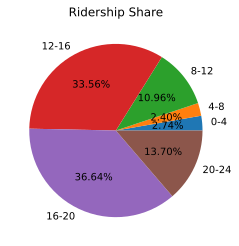

In [576]:
plt.pie(Weekend_Time_Entires["Time_Period_Entries"],labels=['0-4','4-8','8-12','12-16','16-20','20-24'],
        explode = (0, 0, 0,0,0,0), autopct='%1.2f%%')
plt.title('Ridership Share')
plt.savefig("Time Period Ridership Share",dpi=300)
plt.show()

<BarContainer object of 6 artists>

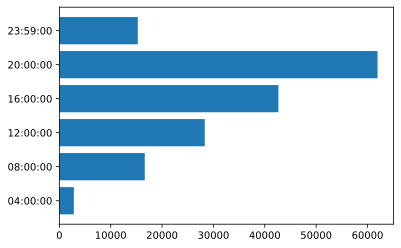

In [547]:
plt.barh(Week_Time_Entires["TIME"],Week_Time_Entires["Time_Period_Entries"])

## Viz for weekday

In [548]:
Station_59st_Weekday = Station_59st[(
(Station_59st["DAY_OF_WEEK_NUM"] == 0) |
 (Station_59st["DAY_OF_WEEK_NUM"] == 1)|
 (Station_59st["DAY_OF_WEEK_NUM"] == 2)|
 (Station_59st["DAY_OF_WEEK_NUM"] == 3)|
 (Station_59st["DAY_OF_WEEK_NUM"] == 4)
)
]
Station_59st_Weekday

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Pre_Time,PREV_ENTRIES,Time_Period_Entries,DAY_OF_WEEK_NUM
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,00:00:00,REGULAR,7695730,2681048,2022-03-21 00:00:00,NaT,NaN,NaN,0
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,04:00:00,REGULAR,7695732,2681051,2022-03-21 04:00:00,2022-03-21 00:00:00,7695730.0,2.0,0
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,08:00:00,REGULAR,7695747,2681182,2022-03-21 08:00:00,2022-03-21 04:00:00,7695732.0,15.0,0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,12:00:00,REGULAR,7695779,2681392,2022-03-21 12:00:00,2022-03-21 08:00:00,7695747.0,32.0,0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/21/2022,16:00:00,REGULAR,7695864,2681473,2022-03-21 16:00:00,2022-03-21 12:00:00,7695779.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167449,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/25/2022,04:00:00,REGULAR,117532935,904350,2022-03-25 04:00:00,2022-03-25 00:00:00,117532931.0,4.0,4
167450,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/25/2022,08:00:00,REGULAR,117532935,904361,2022-03-25 08:00:00,2022-03-25 04:00:00,117532935.0,0.0,4
167451,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/25/2022,12:00:00,REGULAR,117532942,904447,2022-03-25 12:00:00,2022-03-25 08:00:00,117532935.0,7.0,4
167452,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/25/2022,16:00:00,REGULAR,117532968,904642,2022-03-25 16:00:00,2022-03-25 12:00:00,117532942.0,26.0,4


In [549]:
Station_59st_Weekday=Station_59st.groupby("TIME")["Time_Period_Entries"].sum().reset_index().rename(columns={"Time_Period_Entries":"Total_Entries"})
Station_59st_Weekend
Station_59st_Weekday

,TIME,Total_Entries
0,00:00:00,15273.0
1,04:00:00,2819.0
2,08:00:00,16632.0
3,12:00:00,28316.0
4,16:00:00,42648.0
5,20:00:00,61955.0


In [550]:
Station_59st_Weekday.at[0,"TIME"]="23:59:00" 
Station_59st_Weekday.sort_values(["TIME"],inplace=True)
Station_59st_Weekday

,TIME,Total_Entries
1,04:00:00,2819.0
2,08:00:00,16632.0
3,12:00:00,28316.0
4,16:00:00,42648.0
5,20:00:00,61955.0
0,23:59:00,15273.0


In [552]:
Station_59st_Weekday["Avg_Entries"]=Station_59st_Weekday["Total_Entries"].apply(lambda x:x/5)

In [553]:
Station_59st_Weekday

,TIME,Total_Entries,Avg_Entries
1,04:00:00,2819.0,563.8
2,08:00:00,16632.0,3326.4
3,12:00:00,28316.0,5663.2
4,16:00:00,42648.0,8529.6
5,20:00:00,61955.0,12391.0
0,23:59:00,15273.0,3054.6


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 13000.0)

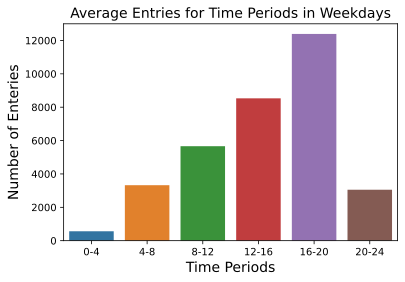

In [563]:
sns.barplot(Station_59st_Weekday["TIME"],Station_59st_Weekday["Avg_Entries"])
plt.xlabel('Time Periods',fontsize=14)
plt.ylabel('Number of Enteries',fontsize=14)
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Average Entries for Time Periods in Weekdays',fontsize=14)
plt.ylim(0,13000)

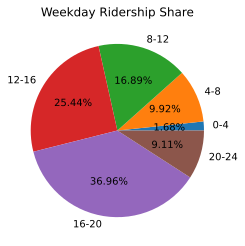

In [578]:
plt.pie(Station_59st_Weekday["Avg_Entries"],labels=['0-4','4-8','8-12','12-16','16-20','20-24'],
        explode = (0, 0, 0,0,0,0), autopct='%1.2f%%')
plt.title('Weekday Ridership Share')
plt.savefig('Weekday Ridership Share',dpi=300)
plt.show()

In [557]:
Station_59st_Weekend = Station_59st[(
(Station_59st["DAY_OF_WEEK_NUM"] == 5)|
(Station_59st["DAY_OF_WEEK_NUM"] == 6)
)
]
Station_59st_Weekend

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Pre_Time,PREV_ENTRIES,Time_Period_Entries,DAY_OF_WEEK_NUM
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684,2022-03-26 00:00:00,2022-03-25 20:00:00,7697165.0,32.0,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687,2022-03-26 04:00:00,2022-03-26 00:00:00,7697197.0,3.0,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713,2022-03-26 08:00:00,2022-03-26 04:00:00,7697200.0,4.0,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805,2022-03-26 12:00:00,2022-03-26 08:00:00,7697204.0,15.0,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874,2022-03-26 16:00:00,2022-03-26 12:00:00,7697219.0,59.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167456,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,04:00:00,REGULAR,117533033,905289,2022-03-27 04:00:00,2022-03-27 00:00:00,117533029.0,4.0,6
167457,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,08:00:00,REGULAR,117533033,905293,2022-03-27 08:00:00,2022-03-27 04:00:00,117533033.0,0.0,6
167458,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,12:00:00,REGULAR,117533034,905324,2022-03-27 12:00:00,2022-03-27 08:00:00,117533033.0,1.0,6
167459,R245A,R051,01-06-01,59 ST,456NQRW,IRT,03/27/2022,16:00:00,REGULAR,117533039,905443,2022-03-27 16:00:00,2022-03-27 12:00:00,117533034.0,5.0,6


In [558]:
Station_59st_Weekend=Station_59st_Weekend.groupby("TIME")["Time_Period_Entries"].sum().reset_index().rename(columns={"Time_Period_Entries":"Total_Entries"})
Station_59st_Weekend

,TIME,Total_Entries
0,00:00:00,5264.0
1,04:00:00,1122.0
2,08:00:00,1855.0
3,12:00:00,4888.0
4,16:00:00,8290.0
5,20:00:00,8811.0


In [559]:
Station_59st_Weekend.at[0,"TIME"]="23:59:00" 
Station_59st_Weekend.sort_values(["TIME"],inplace=True)
Station_59st_Weekend

,TIME,Total_Entries
1,04:00:00,1122.0
2,08:00:00,1855.0
3,12:00:00,4888.0
4,16:00:00,8290.0
5,20:00:00,8811.0
0,23:59:00,5264.0


In [560]:
Station_59st_Weekend["Avg_Entries"]=Station_59st_Weekend["Total_Entries"].apply(lambda x:x/2)

In [561]:
Station_59st_Weekend

,TIME,Total_Entries,Avg_Entries
1,04:00:00,1122.0,561.0
2,08:00:00,1855.0,927.5
3,12:00:00,4888.0,2444.0
4,16:00:00,8290.0,4145.0
5,20:00:00,8811.0,4405.5
0,23:59:00,5264.0,2632.0


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 13000.0)

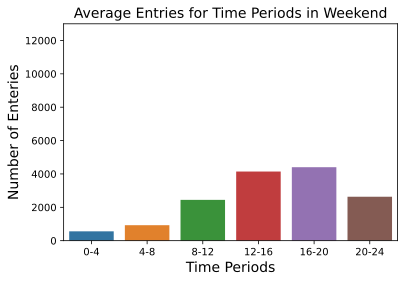

In [565]:
sns.barplot(Station_59st_Weekend["TIME"],Station_59st_Weekend["Avg_Entries"])
plt.xlabel('Time Periods',fontsize=14)
plt.ylabel('Number of Enteries',fontsize=14)
plt.xticks(np.arange(6),['0-4','4-8','8-12','12-16','16-20','20-24'])
plt.title('Average Entries for Time Periods in Weekend',fontsize=14)
plt.ylim(0,13000)

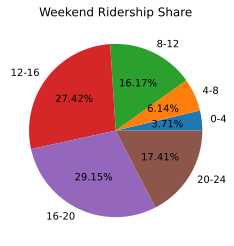

In [577]:
plt.pie(Station_59st_Weekend["Avg_Entries"],labels=['0-4','4-8','8-12','12-16','16-20','20-24'],
        explode = (0, 0, 0,0,0,0), autopct='%1.2f%%')
plt.title('Weekend Ridership Share')
plt.savefig('Weekend Ridership Share',dpi=300)
plt.show()

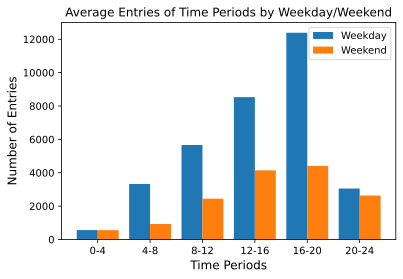

In [573]:

# create data
x = np.arange(6)
y1 = Station_59st_Weekday["Avg_Entries"]
y2 = Station_59st_Weekend["Avg_Entries"]

width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)


plt.xticks(x, ['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'])
plt.xlabel("Time Periods",fontsize=12)
plt.ylabel("Number of Entries",fontsize=12)
plt.legend(["Weekday", "Weekend"])
plt.title("Average Entries of Time Periods by Weekday/Weekend",fontsize=12)
plt.savefig("Time Period",dpi=300)
plt.show()

### Station 59 ST 1/1 to 4/1

In [ ]:
Station_59st = df[
(df["STATION"] == "59 ST")
]
Station_59st